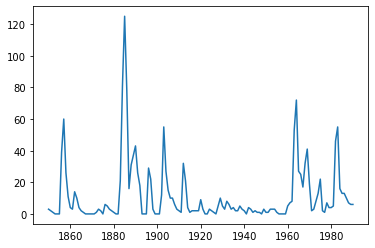

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("aerosol.csv")

plt.plot(data["Year"],data["sol"])
plt.show()

(-3.0072061223630513, 0.034226897298344834, 4, 12, {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}, -73.9684811514931)


C:\Users\Kingster\AppData\Local\Temp\ipykernel_5236\3206823788.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(data).show()


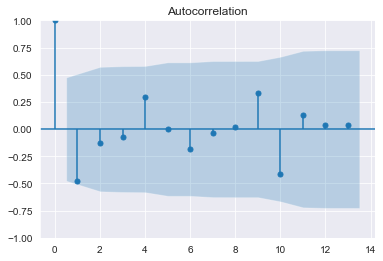

In [27]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf

data = pd.read_csv("aerosol2.csv")
data = np.diff(data["AOD"],1)
plot_acf(data).show()
print(ADF(data))

In [30]:
# BIC TEST TRAVERSAL

from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

data = pd.read_csv("aerosol2.csv")

bic_matrix = []
for p in range(4):
    temp = []
    for q in range(4):
        try:
            temp.append(ARIMA(data["AOD"],order=(p,1,q)).fit().aic)
        except:
            temp.append(None)
    bic_matrix.append(temp)

print(bic_matrix)

C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\base\model.p

[[-106.87664270660397, -111.80920788404265, -112.03463655688319, -113.08199046465793], [-108.7173846269077, -109.98710276566244, -112.05929869110082, -108.01087410296493], [-109.46179451274232, -109.1555325042185, -111.34866844309852, -109.28807725268814], [-111.28835924885189, -107.6131216359623, -109.70535284793459, -107.42818308435295]]


C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    AOD   No. Observations:                   18
Model:                 ARIMA(3, 2, 1)   Log Likelihood                  55.643
Date:                Tue, 15 Nov 2022   AIC                           -101.286
Time:                        19:52:29   BIC                            -97.423
Sample:                             0   HQIC                          -101.088
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9630      0.272     -3.539      0.000      -1.496      -0.430
ar.L2         -0.8810      0.275     -3.198      0.001      -1.421      -0.341
ar.L3         -0.6163      0.244     -2.526      0.0

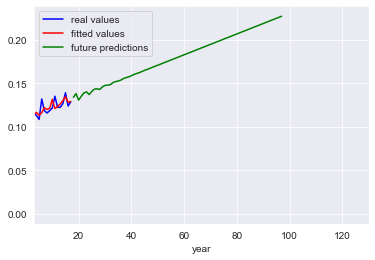

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv("aerosol2.csv")

model = ARIMA(data["AOD"],order=(3,2,1)).fit()
print(model.summary())

fig = plt.figure()
fig.set_facecolor("white")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(data["AOD"],color="blue",label="real values")
ax.plot(model.fittedvalues, color="red",label="fitted values")
ax.plot(model.forecast(80),color="green",label="future predictions")
plt.xlim([3,130])
#plt.ylim([0.4,0.7])
plt.xlabel("year")
plt.ylabel("")
plt.legend(loc="best")
print(model.forecast(7))
np.savetxt("aerosolPred.csv",model.forecast(83),delimiter=",")